# Regresión lineal con Python

## Dr. Pedro Santana


Es un método estadístico que trata de modelar la relación entre una variable dependiente y una o más variables independientes mediante el ajuste de una ecuación lineal.

En la regresión lineal, el algoritmo intenta encontrar una relación lineal entre las características de entrada y el valor de salida.

El valor de salida se predice en función de la suma ponderada de las características de entrada.

Es ampliamente utilizado en machine learning para tareas de predicción.

## Paso: Seleccionar el algoritmo

Imaginemos que queremos predecir el precio de una casa basándonos en su número de habitaciones.

La **regresión lineal** nos ayudará a encontrar la "mejor línea" (o recta) que representa la relación entre el tamaño de la casa y su precio.

### Parte matemática

La idea detrás de la regresión lineal es encontrar la mejor línea (o hiperplano en dimensiones más altas) que se ajuste a nuestros datos. Matemáticamente, esta línea se representa como:

$$y = \beta_0 + \beta_1 x_1 + \epsilon$$

Donde:
- $y$ es la variable dependiente (lo que queremos predecir).
- $x_1$ es la variable independiente.
- $\beta_0$ es el intercepto.
- $\beta_1$ es la pendiente de la línea.
- $\epsilon$ es el error (diferencia entre la predicción y el valor real).

En términos más sencillos, si trazas la línea de regresión en un gráfico, el intercepto $\beta_0$ es el punto donde la línea cruza el eje Y.

En nuestro caso:

- $y$ es el precio de la casa.
- $x_1$ es el número de habitaciones.
- $\beta_0$ y $\beta_1$ son los parámetros que nuestro modelo ha aprendido de los datos.

El objetivo durante el entrenamiento es minimizar el error total (la diferencia entre las predicciones y los valores reales). Específicamente, buscamos minimizar la suma de los errores cuadrados.

> Dicho de forma sencilla: imaginemos que queremos **predecir el precio** de una  casa basándonos en su **número de habitaciones**. La regresión lineal nos ayudará a encontrar la *mejor línea* que representa la relación entre el tamaño de la casa y su precio.

**Ejemplo de regresión lineal con Python**

Vamos a utilizar el dataset **Boston Housing**, que es un conjunto de datos ampliamente utilizado en regresión. Este dataset contiene información sobre distintas casas en Boston, incluyendo características como el número de habitaciones, la tasa de criminalidad en la zona, y el precio medio de las casas.

Para nuestro ejemplo, sólo consideraremos la relación entre el número de habitaciones (*variable independiente*) y el precio medio de las casas (*variable dependiente*).

## Paso: Entrenar

1. Cargar el dataset.
2. Dividir el dataset en conjuntos de entrenamiento y prueba.
3. Entrenar un modelo de regresión lineal utilizando el conjunto de entrenamiento.
4. Evaluar el modelo con el conjunto de prueba.
5. Visualizar los resultados.

### Cargar el dataset

In [7]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Telematica/MTD/Analitica/boston_house_prices.csv')

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Estructura de los datos

- **CRIM**: Tasa de criminalidad per cápita por ciudad.
- **ZN**: Proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados.
- **INDUS**: Proporción de acres de negocios no minoristas por ciudad.
- **CHAS**: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).
- **RM**: Número medio de habitaciones por vivienda.
- **AGE**: Proporción de viviendas ocupadas por sus propietarios construidas antes de 1940.
- **DIS**: Distancias ponderadas a cinco centros de empleo de Boston.
- **RAD**: Índice de accesibilidad a carreteras radiales.
- **TAX**: Tasa de impuesto a la propiedad por cada \$10,000.
- **PTRATIO**: Relación alumno-profesor por ciudad.
- **B**: Proporción de personas de ascendencia afroamericana por ciudad.
- **LSTAT**: Porcentaje de población con un estatus socioeconómico bajo.
- **MEDV**: Precio medio de las viviendas ocupadas por sus propietarios en $1000s.

Para nuestro ejemplo, nos centraremos en **RM** (número medio de habitaciones) y **MEDV** (precio medio de las casas).

### Dividir el dataset

In [8]:
from sklearn.model_selection import train_test_split

# Seleccionar las columnas de interés
X = df[['RM']]
y = df['MEDV']

# Dividir el dataset en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 1), (102, 1), (404,), (102,))

Se dividió el dataset en dos partes:

    Conjunto de entrenamiento: 404 registros.
    Conjunto de prueba: 102 registros.

El conjunto de entrenamiento se utilizará para entrenar el modelo de regresión lineal, mientras que el conjunto de prueba se utilizará para evaluar su rendimiento.

### Entrenar el modelo

In [9]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_train_pred = model.predict(X_train) # entrenamiento
y_test_pred = model.predict(X_test) # prueba

## Visualizar los resultados

*   Los puntos azules representan los datos de entrenamiento.
*   Los puntos rojos representan los datos de prueba.
*   La línea negra es la línea de regresión que nuestro modelo ha aprendido.

La línea de regresión intenta ajustarse lo mejor posible a los datos. A partir de esta línea, podemos hacer predicciones sobre el precio de una casa basándonos en su número de habitaciones. Por ejemplo, una casa con un mayor número de habitaciones tiende a tener un precio más alto, **según indica la pendiente de la línea**.

A través de este modelo, podemos hacer predicciones sobre el precio de una casa basándonos en su número de habitaciones. Es importante mencionar que, en la vida real, el precio de una casa está influenciado por muchos otros factores, y no solo por el número de habitaciones. Sin embargo, este ejemplo sirve para ilustrar el concepto básico de regresión lineal en machine learning.

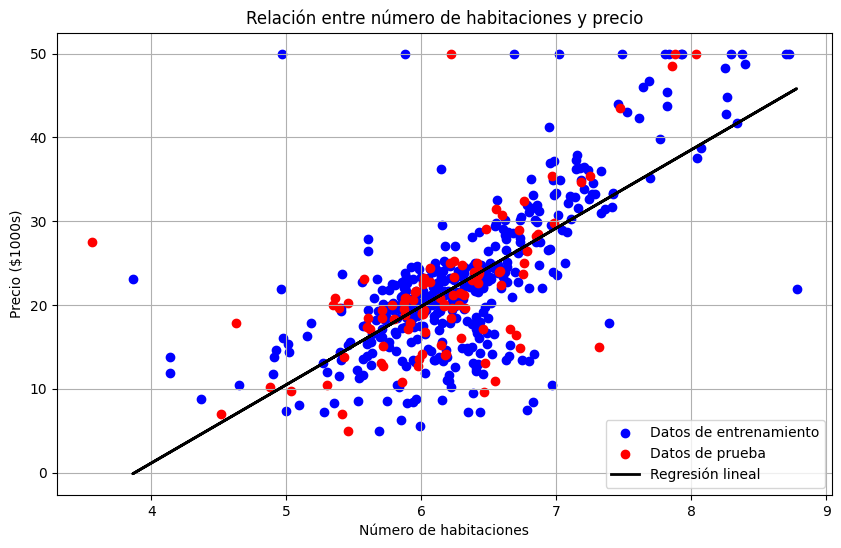

In [10]:
import matplotlib.pyplot as plt

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label="Datos de entrenamiento")
plt.scatter(X_test, y_test, color='red', label="Datos de prueba")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Regresión lineal")
plt.title("Relación entre número de habitaciones y precio")
plt.xlabel("Número de habitaciones")
plt.ylabel("Precio ($1000s)")
plt.legend()
plt.grid(True)
plt.show()

## Evaluar el modelo

1. Error Cuadrático Medio ($MSE$)
2. Coeficiente de determinación ($R^2$)

### Error Cuadrático Medio ($MSE$):

Es una métrica que nos indica cuán alejadas están nuestras predicciones de los valores reales. Se calcula como el promedio de los errores cuadrados:

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

Donde:
- $y_i$ es el valor real.
- $\hat{y}_i$ es la predicción.
- $n$ es el número total de ejemplos.

Un MSE más bajo indica que el modelo se ajusta mejor a los datos. Sin embargo, debemos tener cuidado de no sobreajustar el modelo a los datos de entrenamiento, ya que esto puede llevar a un rendimiento deficiente en datos no vistos previamente.

In [11]:
from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_train, mse_test

(42.99661556265404, 46.144775347317264)

### $MSE$ resultado del entrenamiento

A continuación, se muestran los errores cuadráticos medios ($MSE$) para ambos conjuntos:

*   Error cuadrático medio en el conjunto de entrenamiento: **42.99**
*   Error cuadrático medio en el conjunto de prueba: **46.14**

El error cuadrático medio ($MSE$) mide la cantidad de error que hay entre dos conjuntos de datos, en este caso, entre los valores reales y las predicciones. En general, ***un MSE más bajo*** indica que el modelo tiene un mejor rendimiento.

### Coeficiente de determinación ($R^2$)

Es una medida de cuánta variación en la variable dependiente es explicada por el modelo. Su valor varía entre 0 y 1, siendo 1 una predicción perfecta y 0 indicando que el modelo no es mejor que simplemente tomar el promedio de la variable de respuesta. Es una métrica útil para determinar qué tan bien se ajusta el modelo a los datos observados.

$$R^2 = 1 - \frac{\text{MSE del modelo}}{\text{MSE del modelo nulo}}$$

Donde el modelo nulo es un modelo que siempre predice el promedio de la variable de respuesta, sin tener en cuenta las características.

In [12]:
from sklearn.metrics import r2_score

# Calcular el coeficiente de determinación (R^2)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

r2_train, r2_test

(0.5050658352776293, 0.3707569232254778)

El coeficiente de determinación $R^2$ para nuestro modelo es:

- $R^2$ en el conjunto de entrenamiento: **0.5051**
- $R^2$ en el conjunto de prueba: **0.3708**

Esto significa que:

- Nuestro modelo explica aproximadamente el **50.51 %** de la variabilidad en el precio de las casas en el conjunto de entrenamiento.
- Nuestro modelo explica aproximadamente el **37.08 %** de la variabilidad en el precio de las casas en el conjunto de prueba.

Un $R^2$ de 1 indicaría que el modelo explica toda la variabilidad en el precio de las casas, mientras que un $R^2$ de 0 indicaría que el modelo no explica ninguna variabilidad.

Por lo tanto, los valores obtenidos sugieren que el modelo tiene un ajuste no muy adecuado a los datos, por lo que hay espacio para mejorar, una forma de hacerlo es analizando lass características.

## Identificación de caracetrísticas

La identificación de características (**feature selection**) es el proceso de seleccionar un subconjunto de características relevantes para la construcción de modelos, *eliminando aquellas que no aportan mucha información* o que pueden ser redundantes. Esto puede mejorar el desempeño del modelo, reducir la complejidad y aumentar la velocidad de entrenamiento.

In [13]:
from sklearn.feature_selection import RFE

# Utilizar RFE con un modelo de regresión lineal
estimator = LinearRegression()
# Seleccionar las 5 características más importantes
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(df.drop("MEDV", axis=1), df["MEDV"])

# Obtener las características seleccionadas
selected_features = df.columns[:-1][selector.support_]
selected_features

Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], dtype='object')

### Resultados RFE

Tras aplicar el método de Eliminación Recursiva de Características (RFE) con un modelo de regresión lineal, las 5 características más relevantes identificadas en el dataset **Boston Housing** son:

1. `CHAS`: Variable dummy de Charles River (1 si la propiedad limita con el río; 0 en caso contrario).
2. `NOX`: Concentración de óxidos nítricos (partes por 10 millones).
3. `RM`: Número medio de habitaciones por vivienda.
4. `DIS`: Ponderación de las distancias a cinco centros de empleo de Boston.
5. `PTRATIO`: Proporción alumno-profesor por localidad.

Estas características se consideran las más influyentes en la predicción del precio de las viviendas según el método RFE con un modelo de regresión lineal.

### Re-entrenar con las características seleccionadas

In [14]:
from sklearn.metrics import r2_score

# Seleccionar las características identificadas por RFE
X_selected = df[selected_features]

# Dividir el dataset con las características seleccionadas en conjunto de entrenamiento y prueba
X_train_selected, X_test_selected = train_test_split(X_selected, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal con las características seleccionadas
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# Realizar predicciones en el conjunto de entrenamiento y de prueba
y_train_pred_selected = model_selected.predict(X_train_selected)
y_test_pred_selected = model_selected.predict(X_test_selected)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2) para el entrenamiento y prueba
mse_train_selected = mean_squared_error(y_train, y_train_pred_selected)
mse_test_selected = mean_squared_error(y_test, y_test_pred_selected)

r2_train_selected = r2_score(y_train, y_train_pred_selected)
r2_test_selected = r2_score(y_test, y_test_pred_selected)

mse_train_selected, mse_test_selected, r2_train_selected, r2_test_selected

(30.37937073761937, 33.49662524091357, 0.6503029765469577, 0.543230639449175)

### Resultados del *Feature selection*

**Error Cuadrático Medio ($MSE$):**
- Conjunto de entrenamiento: ***30.38***
- Conjunto de prueba: ***33.50***

**Coeficiente de Determinación ($R^2$):**
- Conjunto de entrenamiento: ***0.6503***
- Conjunto de prueba: ***0.5432***

### Interpretación

Comparando con los resultados del modelo original:

- El MSE ha disminuido para ambos conjuntos, lo que indica un mejor ajuste.
- El coeficiente $R^2$ ha aumentado para ambos conjuntos, lo que indica que el modelo con las características seleccionadas explica una mayor proporción de la variabilidad en el precio de las casas.

Para concluir, la identificación y selección de características **ha mejorado el desempeño** de nuestro modelo. Estos resultados demuestran **la importancia de seleccionar características relevantes** para mejorar la precisión y la eficiencia del modelo.